In [2]:
import globals as gl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/ExtFlexChord
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


In [3]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

dat = pd.DataFrame()
for sn in snS:
    dat_tmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'{experiment}_{sn}.dat'), sep='\t')
    dat = pd.concat([dat, dat_tmp])
    
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

sns.lineplot(data=dat, ax=axs, x='BN', hue='subNum', y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, palette='Set2')

axs.set_title('Success rate')
axs.set_ylabel('% success')


FileNotFoundError: [Errno 2] No such file or directory: '/cifs/diedrichsen/data/Chord_exp/ExtFlexChord/efc4/pilot/day1/efc4_1000.dat'

FileNotFoundError: [Errno 2] No such file or directory: '/cifs/diedrichsen/data/Chord_exp/ExtFlexChord/efc4/pilot/day1/efc4_1000.dat'

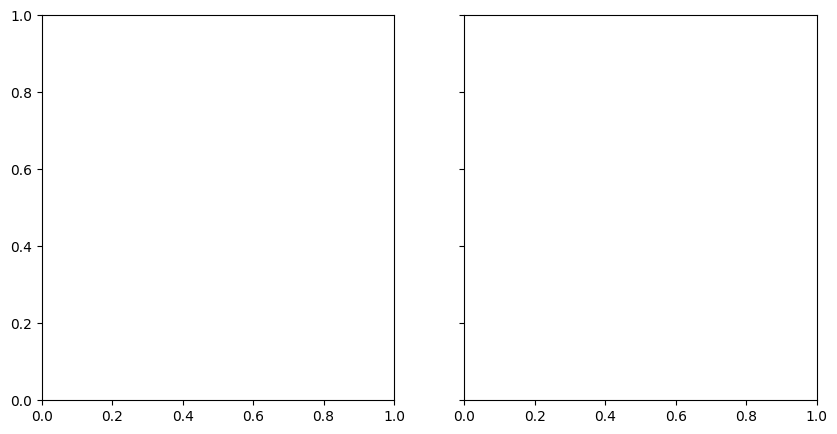

In [4]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

fig, axs = plt.subplots(nrows=1, ncols=len(snS), sharex=True, sharey=True, figsize=(10, 5))

for s, sn in enumerate(snS):
    dat = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'{experiment}_{sn}.dat'), sep='\t')
    
    if s == 0:
        sns.lineplot(data=dat, ax=axs[s], x='BN', hue='chordID', y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, palette='Set2')
    else:
        sns.lineplot(data=dat, ax=axs[s], x='BN', hue='chordID', y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, palette='Set2', legend=False)
    
    axs[s].set_title(f'subj{sn}')

axs[0].set_ylabel('% success')
axs[0].legend(loc='upper left', ncol=2)
# axs.set_title('Success rate')
# axs.set_ylabel('% success')

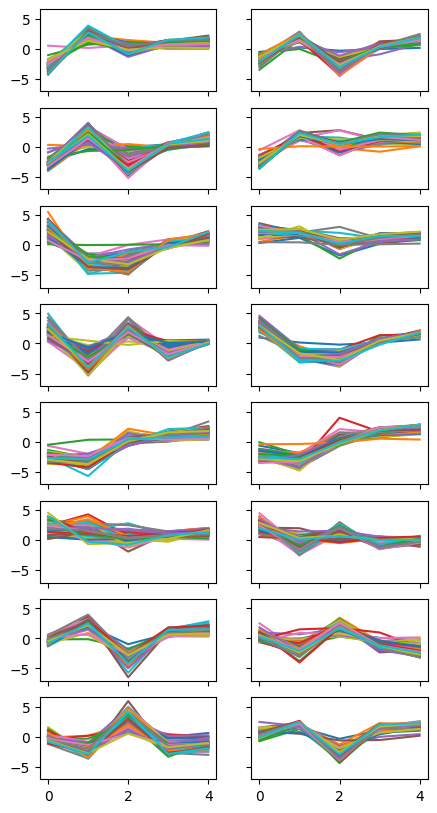

In [14]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

fig, axs = plt.subplots(nrows=8, ncols=len(snS), sharex=True, sharey=True, figsize=(5, 10))

for s, sn in enumerate(snS):

    data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')

    for ch, chordID in enumerate(data.chordID.unique()):
        data_tmp = data[data['chordID'] == chordID]
        force = data_tmp[['thumb', 'index', 'middle', 'ring', 'pinkie']].to_numpy()
        axs[ch, s].plot(force.T)